# Mini example of keyword selection

In [1]:
from src.keyword_generator_2 import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
kw_generator = KeywordGenerator(model='gpt-3.5-turbo')

In [3]:
w0 = 'cancer'
n0 = 40
n1 = 100
key_list = []
keys = kw_generator.get_kwds(w0,n0)
key_list.append(keys)
kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
kwds_dict = {}
kwds_dict_s = {}
for w in kw_list:
    w_sp = w.split(":")
    kwds_dict[w_sp[0]] = int(w_sp[1])
    short = (w_sp[0]).replace(" ","").replace("-","")
    kwds_dict_s[short] = int(w_sp[1])
kwds = [kwds_dict]
kwds_s = [kwds_dict_s]


for w in kwds[0].keys():
    keys = kw_generator.get_kwds(w,10)
    key_list.append(keys)
    kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
    kwds_dict = {w:0}
    w_s = w.replace(" ","").replace("-","")
    kwds_dict_s = {w_s:0}

    for w1 in kw_list:
        w1_sp = w1.split(":")
        kwds_dict[w1_sp[0]] = int(w1_sp[1])
        short = (w1_sp[0]).replace(" ","").replace("-","")
        kwds_dict_s[short] = int(w1_sp[1])
    kwds.append(kwds_dict)
    kwds_s.append(kwds_dict_s)
kwds[0] = {**{w0:0},**kwds[0]}
w0_s = w0.replace(" ","").replace("-","")
kwds_s[0] = {**{w0_s:0},**kwds_s[0]}

In [4]:
kwds_s,kwds

([{'cancer': 0,
   'tumor': 5,
   'oncology': 4,
   'chemotherapy': 4,
   'radiation': 4,
   'metastasis': 4,
   'diagnosis': 4,
   'treatment': 4,
   'genetics': 3,
   'research': 3,
   'prevention': 3,
   'cells': 3,
   'mutation': 3,
   'prognosis': 3,
   'immunotherapy': 3,
   'biomarkers': 3,
   'surgery': 3,
   'clinicaltrials': 3,
   'screening': 3,
   'riskfactors': 3,
   'symptoms': 3,
   'survivalrate': 3,
   'earlydetection': 3,
   'causes': 2,
   'types': 2,
   'stages': 2,
   'sideeffects': 2,
   'palliativecare': 2,
   'hereditary': 2,
   'lifestyle': 2,
   'environmentalfactors': 2,
   'supportgroups': 2,
   'copingstrategies': 2,
   'holisticapproaches': 2,
   'nutrition': 2,
   'exercise': 2,
   'awareness': 2,
   'caregiver': 2,
   'qualityoflife': 2,
   'complementarytherapies': 2,
   'clinicalguidelines': 2},
  {'tumor': 0,
   'cancer': 5,
   'malignant': 4,
   'benign': 4,
   'oncology': 4,
   'metastasis': 4,
   'biopsy': 3,
   'treatment': 3,
   'radiation': 3,
 

In [5]:
count = []
for kw_dictionary in kwds_s:
    t = 'cancer' in list(kw_dictionary.keys())
    count.append(t*1.)
sum(count)

7.0

In [6]:
G = nx.DiGraph()
for kw_dict in kwds_s:
    for i,(k,v) in enumerate(kw_dict.items()):
        origin = list(kw_dict.keys())[0]
        if i>0:
            G.add_edge(origin,k,weight=v)


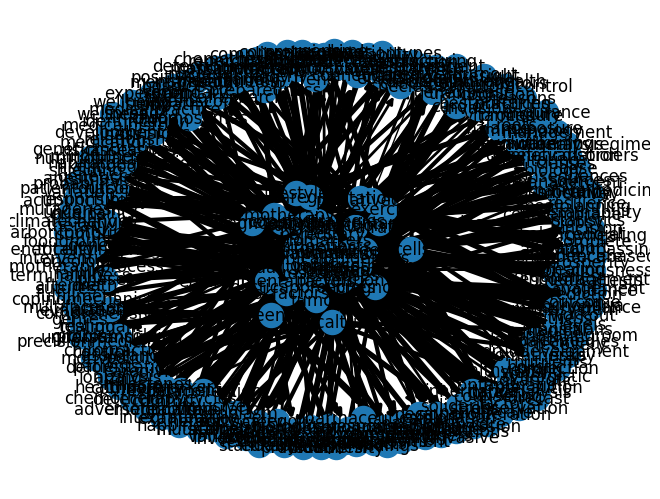

In [7]:
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

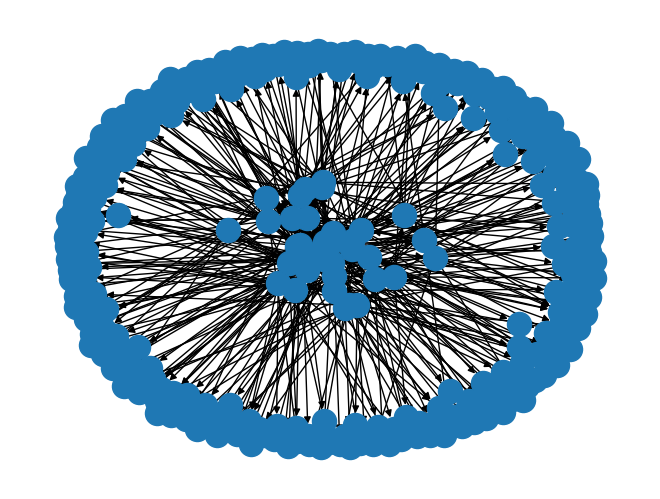

In [8]:
nx.draw(G)

In [9]:
personalization = {node: 0 for node in G.nodes()} 
personalization['cancer'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('cancer', 0.3761416944237621),
 ('treatment', 0.021741442380061395),
 ('diagnosis', 0.01773445255938909),
 ('tumor', 0.01703190883463975),
 ('radiation', 0.015067516119902107),
 ('chemotherapy', 0.014349741904272713),
 ('oncology', 0.014307892848618376),
 ('metastasis', 0.013231231525174287),
 ('symptoms', 0.012076706443887255),
 ('research', 0.012074436333216051),
 ('prognosis', 0.011082166975051443),
 ('genetics', 0.010601491966828505),
 ('prevention', 0.010516699376879362),
 ('cells', 0.009739347651633628),
 ('screening', 0.009666847105255408),
 ('biomarkers', 0.009476773533406523),
 ('clinicaltrials', 0.009390376455293394),
 ('riskfactors', 0.009334218354519858),
 ('mutation', 0.008716479246010985),
 ('immunotherapy', 0.008716479246010985),
 ('surgery', 0.008716479246010985),
 ('survivalrate', 0.008716479246010985),
 ('earlydetection', 0.008716479246010985),
 ('sideeffects', 0.007695799401454382),
 ('qualityoflife', 0.00632221852966984),
 ('nutrition', 0.006260250970195595),
 ('e